# Module 2

In [36]:
#Importing data into python dataframe
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
product_a = pd.read_csv('product_a.csv')

In [37]:
#Checking data
product_a.head(10)
product.shape

Unnamed: 0      date_w  price  total_vol     plu1       plu2    plu3  \
0           0  2016-12-24   1.33   64236.62  1036.74   54454.85   48.16   
1           1  2016-12-17   1.35   54876.98   674.28   44638.81   58.33   
2           2  2016-12-10   0.93  118220.22   794.70  109149.67  130.50   
3           3  2016-12-03   1.08   78992.15  1132.00   71976.41   72.58   
4           4  2016-11-26   1.28   51039.60   941.48   43838.39   75.78   
5           5  2016-11-19   1.26   55979.78  1184.27   48067.99   43.61   
6           6  2016-11-12   0.99   83453.76  1368.92   73672.72   93.26   
7           7  2016-11-05   0.98  109428.33   703.75  101815.36   80.00   
8           8  2016-10-29   1.02   99811.42  1022.15   87315.57   85.34   
9           9  2016-10-22   1.07   74338.76   842.40   64757.44  113.00   

     bags_t    bags_s  bags_l  bags_lx type  year location  
0   8696.87   8603.62   93.25      0.0    A  2015   Albany  
1   9505.56   9408.07   97.49      0.0    A  2015   Albany  
2   8145.35   8042.21  103.14      0.0    A  2015   Albany  
3   5811.16   5677.40  133.76      0.0    A  2015   Albany  
4   6183.95   5986.26  197.69      0.0    A  2015   Albany  
5   6683.91   6556.47  127.44      0.0    A  2015   Albany  
6   8318.86   8196.81  122.05      0.0    A  2015   Albany  
7   6829.22   6266.85  562.37      0.0    A  2015   Albany  
8  11388.36  11104.53  283.83      0.0    A  2015   Albany  
9   8625.92   8061.47  564.45      0.0    A  2015   Albany

## Questions 2 to 10

In [38]:
#Converting date column into suitable data type

# import datetime class from datetime module
from datetime import datetime
product_a['date_w']=pd.to_datetime(product_a['date_w'])


In [39]:
#product.dtypes
product_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  18249 non-null  int64         
 1   date_w      18249 non-null  datetime64[ns]
 2   price       18249 non-null  float64       
 3   total_vol   18249 non-null  float64       
 4   plu1        18249 non-null  float64       
 5   plu2        18249 non-null  float64       
 6   plu3        18249 non-null  float64       
 7   bags_t      18249 non-null  float64       
 8   bags_s      18249 non-null  float64       
 9   bags_l      18249 non-null  float64       
 10  bags_lx     18249 non-null  float64       
 11  type        18249 non-null  object        
 12  year        18249 non-null  int64         
 13  location    18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [40]:
##Replacing year values for correction
product_a['year'] = product_a['date_w'].dt.year

In [42]:
#Selecting only numerical columns
product=product_a.iloc[:,2:11]
product.isna().sum()

price        0
total_vol    0
plu1         0
plu2         0
plu3         0
bags_t       0
bags_s       0
bags_l       0
bags_lx      0
dtype: int64

In [43]:
#Checking for multiple mode for a column
product.mode()
product['total_vol'].mode()
pd.value_counts(product['total_vol'].values, sort=False)


10187.56      1
3183419.60    1
8155.56       1
13145.55      1
108093.32     1
             ..
5463799.79    1
184669.77     1
117483.82     1
84234.53      1
170250.03     1
Length: 18237, dtype: int64

In [77]:
# summary statistics for all numerical columns except mode
df_stats=pd.DataFrame()
df_stats["Minimum"]=product.min()
df_stats["Maximum"]=product.max()
df_stats["Mean"]=product.mean()
df_stats["Standard_dev"]=product.std()
df_stats["variance"]=product.var()
df_stats["Median"]=product.median()

for i in range(10,100,10):
    df_stats["{0}th_Percentile".format(str(i))]=product.quantile(i/100) 
    
df_stats["25th_Percentile"]=product.quantile(0.25)
df_stats["75th_Percentile"]=product.quantile(0.75)
df_stats["Quart_range"]=product.quantile(0.75)-product.quantile(0.25)
df_stats["Skewness"]=product.skew()
df_stats["Kurtosis"]=product.kurtosis()
df_stats.index.name = 'Field_name'


In [102]:
#Calculating mode for all columns and displaying the summary
list_mode = []

for column in product:
    mode=product[column].mode()
    strmode=','.join(str(x) for x in mode.values)
    list_mode.append(strmode)
df_stats["Mode"]=list_mode

df_stats.round(decimals=2)
df_stats

Minimum      Maximum           Mean  Standard_dev      variance  \
Field_name                                                                    
price          0.44         3.25       1.405978  4.026766e-01  1.621484e-01   
total_vol     84.56  62505646.52  850644.013009  3.453545e+06  1.192698e+13   
plu1           0.00  22743616.17  293008.424531  1.264989e+06  1.600197e+12   
plu2           0.00  20470572.61  295154.568356  1.204120e+06  1.449906e+12   
plu3           0.00   2546439.11   22839.735993  1.074641e+05  1.154853e+10   
bags_t         0.00  19373134.37  239639.202060  9.862424e+05  9.726741e+11   
bags_s         0.00  13384586.80  182194.686696  7.461785e+05  5.567824e+11   
bags_l         0.00   5719096.61   54338.088145  2.439660e+05  5.951939e+10   
bags_lx        0.00    551693.65    3106.426507  1.769289e+04  3.130385e+08   

               Median  10th_Percentile  20th_Percentile  30th_Percentile  \
Field_name                                                                 
price            1.37            0.930            1.050            1.150   
total_vol   107376.76         3896.768         8168.866        15181.304   
plu1          8645.30           94.276          483.362         1368.118   
plu2         29061.02          367.484         1918.532         4265.508   
plu3           184.99            0.000            0.000            0.000   
bags_t       39743.83         1299.208         3347.674         7316.634   
bags_s       26362.82          583.110         1686.086         4761.328   
bags_l        2647.71            0.000           30.918          329.944   
bags_lx          0.00            0.000            0.000            0.000   

            40th_Percentile  ...  60th_Percentile  70th_Percentile  \
Field_name                   ...                                     
price                 1.260  ...            1.480            1.600   
total_vol         42137.088  ...       192430.124       319613.142   
plu1               3261.580  ...        31698.078        77991.410   
plu2              10961.994  ...        53202.052        98296.168   
plu3                 42.704  ...          768.782         3466.120   
bags_t            16643.260  ...        62361.468        88901.748   
bags_s            11502.076  ...        46725.754        68884.094   
bags_l             1105.110  ...         6087.796        14392.206   
bags_lx               0.000  ...            0.000           20.252   

            80th_Percentile  90th_Percentile  25th_Percentile  \
Field_name                                                      
price                 1.740            1.930             1.10   
total_vol        604868.968      1387045.760         10838.58   
plu1             152679.068       538385.184           854.07   
plu2             222163.620       500784.552          3008.78   
plu3              10972.600        31492.442             0.00   
bags_t           149306.360       442141.928          5088.64   
bags_s           104537.112       354266.852          2849.42   
bags_l            34350.986        94295.338           127.47   
bags_lx             557.114         3688.912             0.00   

            75th_Percentile  Quart_range   Skewness    Kurtosis  \
Field_name                                                        
price                  1.66         0.56   0.580303    0.325196   
total_vol         432962.29    422123.71   9.007687   92.104458   
plu1              111020.20    110166.13   8.648220   86.809113   
plu2              150206.86    147198.08   8.942466   91.949022   
plu3                6243.42      6243.42  10.159396  132.563441   
bags_t            110783.37    105694.73   9.756072  112.272156   
bags_s             83337.67     80488.25   9.540660  107.012885   
bags_l             22029.25     21901.78   9.796455  117.999481   
bags_lx              132.50       132.50  13.139751  233.602612   

                                                         Mode  
Field_name      

In [83]:
#Pearson Correlation matrix
product.corr(method='pearson')

price  total_vol      plu1      plu2      plu3    bags_t  \
price      1.000000  -0.192752 -0.208317 -0.172928 -0.179446 -0.177088   
total_vol -0.192752   1.000000  0.977863  0.974181  0.872202  0.963047   
plu1      -0.208317   0.977863  1.000000  0.926110  0.833389  0.920057   
plu2      -0.172928   0.974181  0.926110  1.000000  0.887855  0.905787   
plu3      -0.179446   0.872202  0.833389  0.887855  1.000000  0.792314   
bags_t    -0.177088   0.963047  0.920057  0.905787  0.792314  1.000000   
bags_s    -0.174730   0.967238  0.925280  0.916031  0.802733  0.994335   
bags_l    -0.172940   0.880640  0.838645  0.810015  0.698471  0.943009   
bags_lx   -0.117592   0.747157  0.699377  0.688809  0.679861  0.804233   

             bags_s    bags_l   bags_lx  
price     -0.174730 -0.172940 -0.117592  
total_vol  0.967238  0.880640  0.747157  
plu1       0.925280  0.838645  0.699377  
plu2       0.916031  0.810015  0.688809  
plu3       0.802733  0.698471  0.679861  
bags_t     0.994335  0.943009  0.804233  
bags_s     1.000000  0.902589  0.806845  
bags_l     0.902589  1.000000  0.710858  
bags_lx    0.806845  0.710858  1.000000

In [84]:
#Spearman’s Rank correlation matrix 
product.corr(method='spearman')

price  total_vol      plu1      plu2      plu3    bags_t  \
price      1.000000  -0.612239 -0.596170 -0.513732 -0.532825 -0.596972   
total_vol -0.612239   1.000000  0.902887  0.940025  0.828223  0.952550   
plu1      -0.596170   0.902887  1.000000  0.793939  0.754838  0.837121   
plu2      -0.513732   0.940025  0.793939  1.000000  0.819905  0.856946   
plu3      -0.532825   0.828223  0.754838  0.819905  1.000000  0.779323   
bags_t    -0.596972   0.952550  0.837121  0.856946  0.779323  1.000000   
bags_s    -0.536403   0.925874  0.822036  0.833764  0.780185  0.961018   
bags_l    -0.511142   0.702067  0.638535  0.635465  0.571869  0.753044   
bags_lx   -0.427207   0.659949  0.615535  0.628893  0.652807  0.652582   

             bags_s    bags_l   bags_lx  
price     -0.536403 -0.511142 -0.427207  
total_vol  0.925874  0.702067  0.659949  
plu1       0.822036  0.638535  0.615535  
plu2       0.833764  0.635465  0.628893  
plu3       0.780185  0.571869  0.652807  
bags_t     0.961018  0.753044  0.652582  
bags_s     1.000000  0.603582  0.641796  
bags_l     0.603582  1.000000  0.500590  
bags_lx    0.641796  0.500590  1.000000

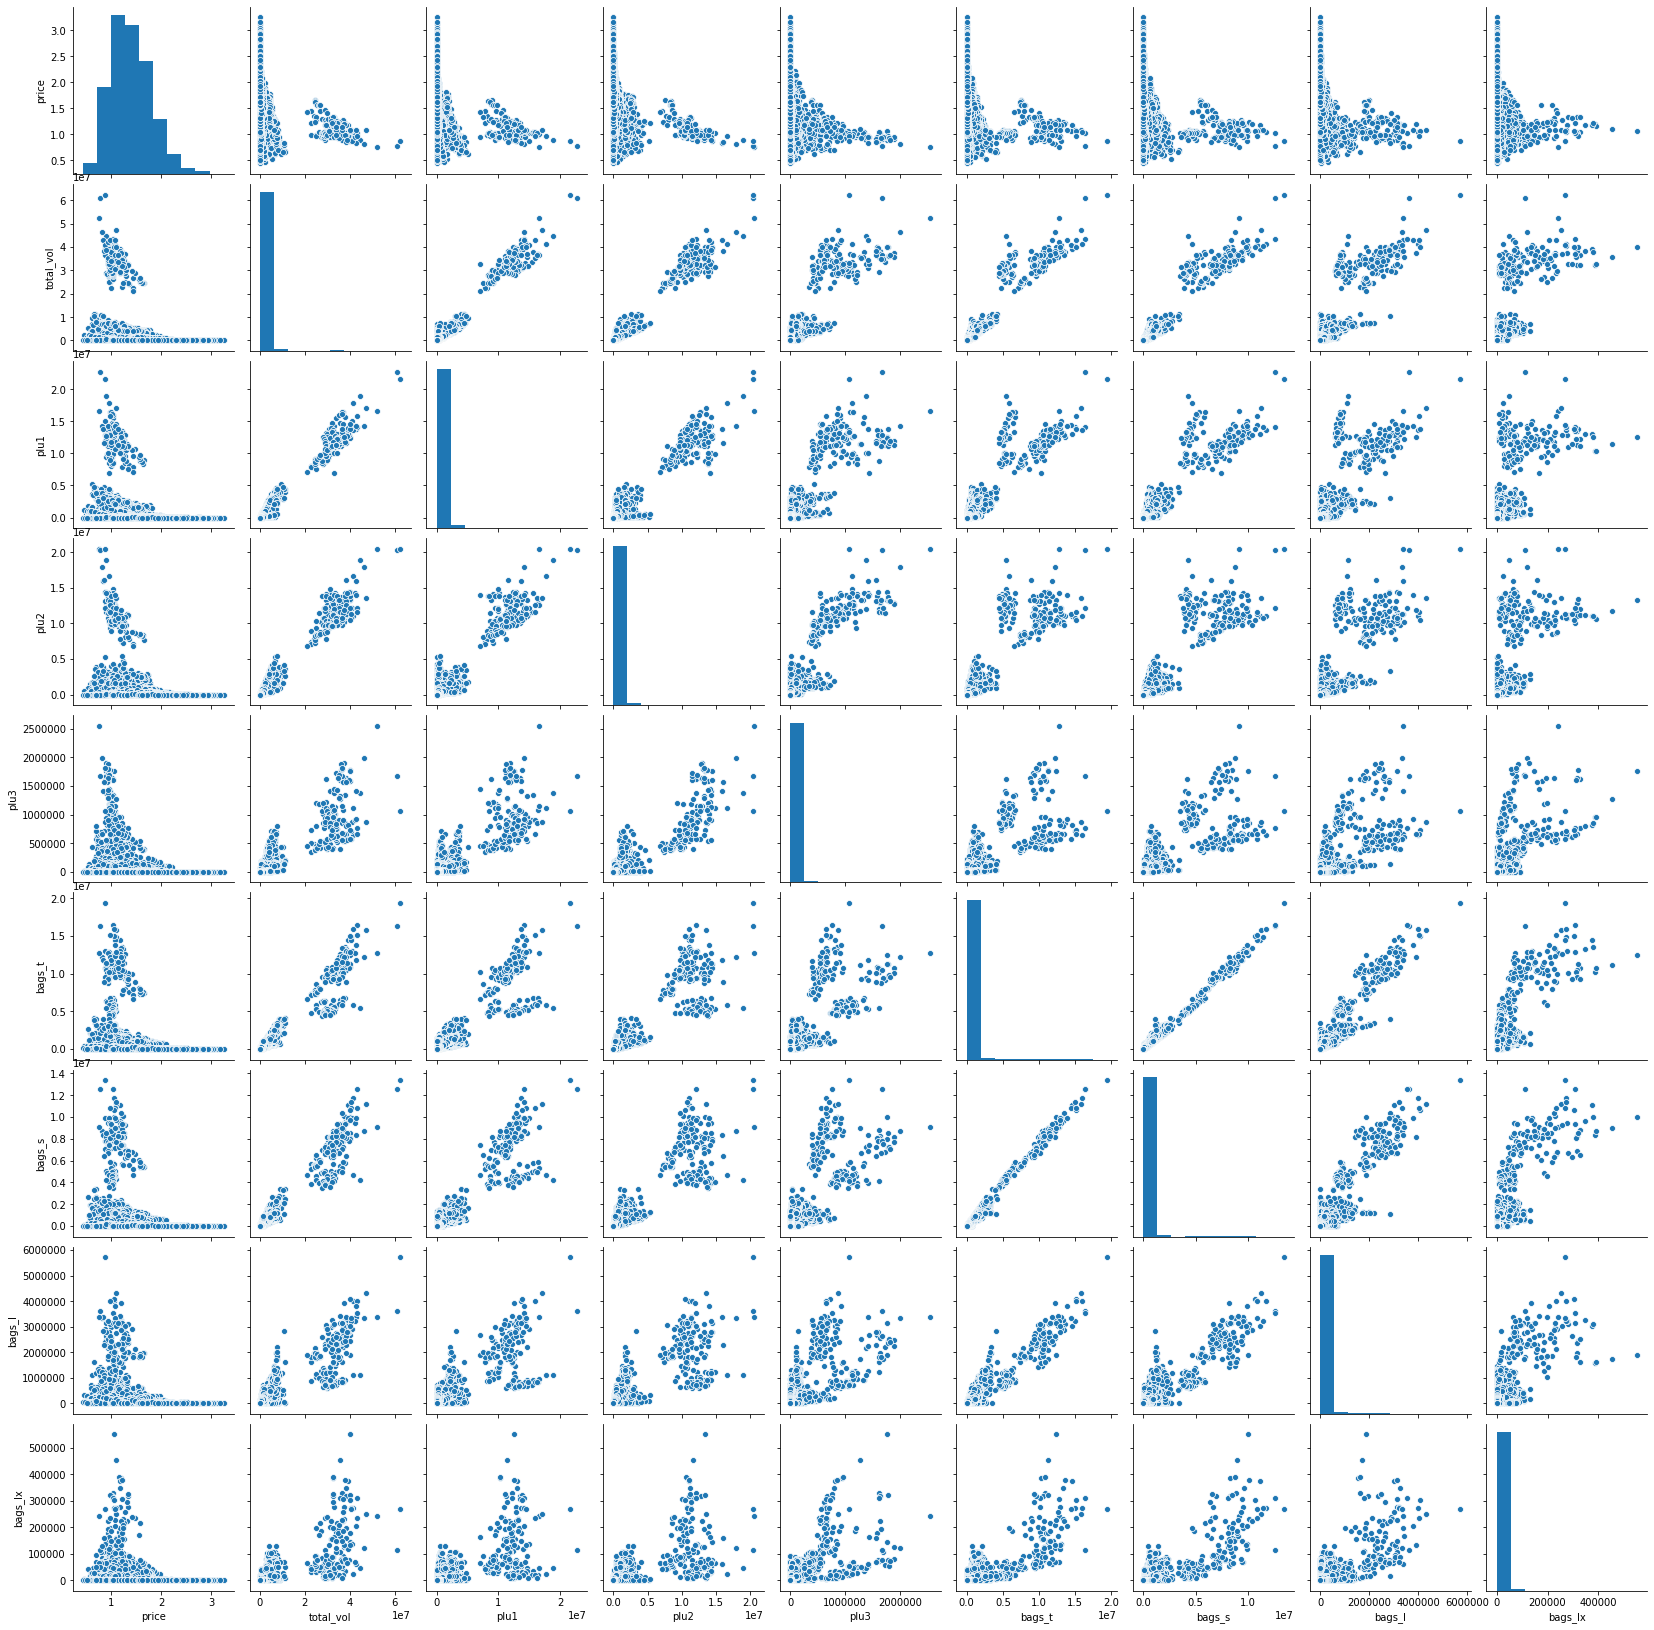

In [85]:
# Creating pairplot
sns.pairplot(product)

In [121]:
# generating set sorted by date for time series analysis 
productsort=product_a.iloc[:,1:14]
productsort=productsort.sort_values(by=['date_w'])

##Removing totalUSA rows as this would duplicate the plot##
productsort = productsort[productsort.location != 'TotalUS']
productsort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 11569 to 8814
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_w     17911 non-null  datetime64[ns]
 1   price      17911 non-null  float64       
 2   total_vol  17911 non-null  float64       
 3   plu1       17911 non-null  float64       
 4   plu2       17911 non-null  float64       
 5   plu3       17911 non-null  float64       
 6   bags_t     17911 non-null  float64       
 7   bags_s     17911 non-null  float64       
 8   bags_l     17911 non-null  float64       
 9   bags_lx    17911 non-null  float64       
 10  type       17911 non-null  object        
 11  year       17911 non-null  int64         
 12  location   17911 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


In [122]:
#Time series graph of monthly and yearly for Total Volume of sales
ProductPlot=productsort.groupby('date_w', as_index=False).agg({"total_vol": "sum", "plu1":"sum"})
fig = px.line(ProductPlot,x='date_w', y="total_vol")
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),
    type='date'
)
fig.show()

In [123]:
#Time series graph of monthly and yearly for mean price
ProductPlot2=productsort.groupby('date_w', as_index=False).agg({"price": "mean"})

fig = px.line(ProductPlot2,x='date_w', y="price")
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [91]:
##Time series graph - price vs total volume by type and location
px.scatter(productsort, x="price", y="bags_t", log_y=True, color='type', hover_name="location", animation_frame="year", animation_group="location")

In [92]:
#Year based bar chart per location and type of Total volume

DataYrLocPlot=productsort.groupby(['year', 'location','type'], as_index=False).agg({"total_vol": "sum", })
#DataYrLocPlot.info()

figbar = px.bar(DataYrLocPlot,  x="location",  y= "total_vol", color='type', facet_row="year")
figbar.show()




In [93]:
figtest = px.bar(DataYrLocPlot, x='year', y='total_vol', title='Total Volume by location and year',
             color='location', barmode='group')

figtest.show()

In [94]:
#Bar chart - year vs type
DataYrTypePlot=productsort.groupby(['year', 'type'],as_index=False).agg({"total_vol": "sum", "plu1":"sum"})
figbar = px.bar(DataYrTypePlot, x="year", y="total_vol", color="type", barmode="group",)
figbar.show()

In [95]:
#Price comparision for each type 
px.histogram(productsort, x="price", color="type")


In [104]:
#Price comparision for each location 
px.box(productsort, x="location", y="price")

In [105]:
#Price comparision for type and location
px.violin(productsort, x="location", y="price", box=True, color="type" )

In [106]:
#Box plot of price per type
px.box(productsort, x="type", y="price")

In [107]:
import requests
from xml.etree import ElementTree
import folium

In [198]:
product_mean=productsort.groupby(['location'], as_index=False).mean()

product_VolTot=productsort.groupby(['location','type'], as_index=False).agg({"bags_t": "sum", })
product_VolTot.info()
product_VolTot=round(product_VolTot,2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  106 non-null    object 
 1   type      106 non-null    object 
 2   bags_t    106 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.3+ KB


In [199]:
product_mean=round(product_mean,2)
product_mean.head(5)

location  price  total_vol       plu1       plu2      plu3  \
0               Albany   1.56   47537.87    1824.08   37621.21    162.83   
1              Atlanta   1.34  262145.32  146116.87   31218.51    311.39   
2  BaltimoreWashington   1.53  398561.89   35656.22  245982.89  12466.73   
3                Boise   1.35   42642.57   20019.51    3461.68   3186.79   
4               Boston   1.53  287792.85    4994.61  214219.86   4982.29   

      bags_t     bags_s    bags_l  bags_lx     year  
0    7929.75    6647.77   1153.50   128.49  2017.14  
1   84498.56   51605.73  32070.04   822.79  2017.14  
2  104456.05  100939.68   2903.98   612.38  2017.14  
3   15974.59   13840.04   2103.63    30.92  2017.14  
4   63596.09   58906.59   4438.36   251.12  2017.14

In [200]:
product_VolTot

location type        bags_t
0                 Albany    A  2.366259e+06
1                 Albany    C  3.139954e+05
2                Atlanta    A  2.759711e+07
3                Atlanta    C  9.634084e+05
4    BaltimoreWashington    A  3.305902e+07
..                   ...  ...           ...
101                Tampa    C  5.673612e+05
102                 West    A  3.488013e+08
103                 West    C  1.827231e+07
104     WestTexNewMexico    A  3.401258e+07
105     WestTexNewMexico    C  1.283939e+06

[106 rows x 3 columns]

In [201]:
import requests

api_key = "********"
url = "https://maps.googleapis.com/maps/api/geocode/json?address={0}, USA&key=" + api_key

# create empty lists
list_lat = []   
list_lng = []

for index, row in product_mean.iterrows():
    response = requests.get(url.format(row['location']))
    response_json = response.json()
    
    list_lat.append(response_json['results'][0]['geometry']['location']['lat'])
    list_lng.append(response_json['results'][0]['geometry']['location']['lng'])

product_mean['lat'] = list_lat
product_mean['lng'] = list_lng

In [202]:

product_mean['lat'] = pd.to_numeric(list_lat)
product_mean['lng'] = pd.to_numeric(list_lng)


In [203]:
##checking min and max values to selet ranges for bags_t
product_mean['bags_t'].min(); product_mean['bags_t'].max()

1086016.66

In [204]:
##Checking the GPS location for duplicates 
pd.value_counts(product_mean['lat'].values, sort=False)

## rows with duplicate lattitues
datachk = product_mean[product_mean.lat == 37.090240]

#print()
datachk


location  price   total_vol        plu1       plu2      plu3  \
35        Plains   1.44   920676.12   424589.82  258388.57   7380.10   
45  SouthCentral   1.10  2991951.53  1582962.68  652218.95  66259.74   
46     Southeast   1.40  1820231.98  1004991.40  268817.86   9358.67   
51          West   1.27  3215322.95  1179261.93  889819.30  60225.06   

        bags_t     bags_s     bags_l  bags_lx     year       lat        lng  
35   230317.17  203433.80   23590.66  3292.71  2017.14  37.09024 -95.712891  
45   690510.16  546791.37  135907.81  7810.98  2017.14  37.09024 -95.712891  
46   537064.05  316281.88  213336.12  7446.04  2017.14  37.09024 -95.712891  
51  1086016.66  658903.22  424650.02  2463.42  2017.14  37.09024 -95.712891

In [205]:
##Removing wrongly added GPS address
# Plains have got many locations and others are more generic..

product_mean=product_mean[product_mean.lat!=37.090240]


In [206]:
##Adding colour column for  mean values  of bags_t

def colors(bag_t_mean): 
    num = int(round(bag_t_mean))    
    if num in range(0,200000): 
        col = 'pink'
    elif num in range(200001,400000): 
        col = 'purple'
    elif num in range(400001,600000): 
        col = 'red'
    elif num in range(600001,800000): 
        col = 'orange'
    elif num in range(800001,1000000): 
        col = 'blue'
    else: 
        col='darkpurple'
    return col 

In [207]:
##Adding colours column to the mean dataframe
for index, row in product_mean.iterrows():
    product_mean.at[index,'colour'] = colors(row['bags_t'])

product_mean.round(2)   
product_mean.head(15)

location  price   total_vol        plu1        plu2      plu3  \
0                Albany   1.56    47537.87     1824.08    37621.21    162.83   
1               Atlanta   1.34   262145.32   146116.87    31218.51    311.39   
2   BaltimoreWashington   1.53   398561.89    35656.22   245982.89  12466.73   
3                 Boise   1.35    42642.57    20019.51     3461.68   3186.79   
4                Boston   1.53   287792.85     4994.61   214219.86   4982.29   
5      BuffaloRochester   1.52    67936.30     1776.67    31663.95    144.34   
6            California   1.40  3044324.42  1180375.78  1039915.39  94204.28   
7             Charlotte   1.61   105193.92    22378.14    36628.02  11578.47   
8               Chicago   1.56   395569.05    32083.08   254519.04  59069.20   
9      CincinnatiDayton   1.21   131721.92     5411.70    61058.90   3421.03   
10             Columbus   1.25    88737.76    37237.06    16910.30   4955.85   
11        DallasFtWorth   1.09   616625.11   327090.14   139557.68  12492.82   
12               Denver   1.22   410954.25    78191.87   150326.97   8006.41   
13              Detroit   1.28   187640.29    55571.45    34799.35  25487.58   
14          GrandRapids   1.50    89383.83     1459.37    51010.43   9786.50   

       bags_t     bags_s     bags_l   bags_lx     year        lat         lng  \
0     7929.75    6647.77    1153.50    128.49  2017.14  42.652579  -73.756232   
1    84498.56   51605.73   32070.04    822.79  2017.14  33.748995  -84.387982   
2   104456.05  100939.68    2903.98    612.38  2017.14  39.177404  -76.668392   
3    15974.59   13840.04    2103.63     30.92  2017.14  43.615019 -116.202314   
4    63596.09   58906.59    4438.36    251.12  2017.14  42.360082  -71.058880   
5    34351.34   30379.98    3729.05    242.31  2017.14  43.205788  -77.667090   
6   729828.98  677803.79   36425.85  15599.34  2017.14  36.778261 -119.417932   
7    34609.30   31490.69    2912.68    205.93  2017.14  35.227087  -80.843127   
8    49897.63   43771.16    5005.55   1120.93  2017.14  41.878114  -87.629798   
9    61828.16   16751.17   44296.43    780.56  2017.14  39.542043  -84.287421   
10   29634.28   23878.08    5103.20    653.00  2017.14  39.961176  -82.998794   
11  137484.47  120774.37   15431.13   1278.97  2017.14  32.899809  -97.040335   
12  174429.01   55513.62  118760.12    155.27  2017.14  39.739236 -104.990251   
13   71775.34   58991.34    7905.23   4878.77  2017.14  42.331427  -83.045754   
14   27127.50   22288.39    2357.40   2481.70  2017.14  42.963360  -85.668086   

    colour  
0     pink  
1     pink  
2     pink  
3     pink  
4     pink  
5     pink  
6   orange  
7     pink  
8     pink  
9     pink  
10    pink  
11    pink  
12    pink  
13    pink  
14    pink

In [208]:
##Function for adding tooltip with Total values of bags_t with types
def findByLoc(loct):
    valueA = 0
    valueC = 0
    total = 0
    dfByLoc = product_VolTot.loc[product_VolTot['location'] == loct]
    for index, row in dfByLoc.iterrows():
        if row['type'] == 'A':
            valueA = row['bags_t']
        elif row['type'] == 'C':
            valueB = row['bags_t']
    total = valueA + valueB
    concatValue = 'Bags_T<br>A={0}<br>C={1}<br>Total={2}'.format(valueA,valueB,total)
    return concatValue


In [209]:
##Plotting values on a map using folium
map = folium.Map(location=[43.299428, -87.217933], zoom_start=4)

for i in range(0,len(product_mean)):
    rowVal=product_mean.iloc[i]
    tooltipVal = findByLoc(str(rowVal['location']))    
    folium.Marker([rowVal['lat'], rowVal['lng']],popup=['location :'+str(rowVal['location'])+'<br>Avg_Total:'+str(rowVal['total_vol'])
                +'<br>Avg_Plu1:'+str(rowVal['plu1'])+'<br>Avg_Plu2:'+str(rowVal['plu2'])+'<br>Avg_Plu3:'+str(rowVal['plu3'])
                +'<br>Avg_bags_t:'+str(rowVal['bags_t'])+'<br>Avg_bags_s:'+str(rowVal['bags_s'])+'<br>Avg_bags_t:'+str(rowVal['bags_l'])
                +'<br>Avg_bags_lx:'+str(rowVal['bags_lx'])],icon=folium.Icon(color=rowVal['colour']), icon_color=rowVal['colour'],
                  tooltip=tooltipVal).add_to(map)

map



In [210]:
# save method of Map object will create a map 
map.save("SalesUSA_map.html" ) 